# Modeling F1 Race Results

### Packages

In [106]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print("packages imported")

packages imported


### Importing data

In [107]:
current_season_df = pd.read_csv("openf1_data.csv")

In [108]:
current_season_np = current_season_df.to_numpy()
current_season_np

array([[1, 1140, 63, ..., 0, 0, 1],
       [2, 1140, 63, ..., 0, 0, 1],
       [4, 1140, 63, ..., 0, 0, 1],
       ...,
       [63, 1263, 23, ..., 0, 0, 0],
       [81, 1263, 23, ..., 0, 0, 0],
       [87, 1263, 23, ..., 0, 0, 0]], shape=(1245, 112), dtype=object)

In [109]:
current_season_df.columns.to_list()

['driver_number',
 'meeting_key',
 'circuit_key',
 'meeting_name',
 'meeting_start_date',
 'full_name',
 'name_acronym',
 'team_name',
 'headshot_url',
 'Session_1_session_key',
 'Session_1_session_type',
 'Session_1_session_name',
 'Session_1_date_start',
 'Session_1_date_end',
 'Session_1_starting_wind_direction',
 'Session_1_starting_wind_speed',
 'Session_1_starting_rainfall',
 'Session_1_starting_track_temperature',
 'Session_1_starting_air_temperature',
 'Session_1_starting_humidity',
 'Session_1_starting_pressure',
 'Session_1_ending_wind_direction',
 'Session_1_ending_wind_speed',
 'Session_1_ending_rainfall',
 'Session_1_ending_track_temperature',
 'Session_1_ending_air_temperature',
 'Session_1_ending_humidity',
 'Session_1_ending_pressure',
 'Session_1_position',
 'Session_2_session_key',
 'Session_2_session_type',
 'Session_2_session_name',
 'Session_2_date_start',
 'Session_2_date_end',
 'Session_2_starting_wind_direction',
 'Session_2_starting_wind_speed',
 'Session_2_sta

In [110]:
teams = current_season_df["team_name"].unique()

teams_dict = {}
for i, team in enumerate(teams):
    teams_dict[team] = i

current_season_df["team_id"] = current_season_df["team_name"].map(teams_dict)

driver_data = current_season_df[["driver_number", "full_name", "name_acronym", "team_id", "team_name", "headshot_url"]]
driver_data

,driver_number,full_name,name_acronym,team_id,team_name,headshot_url
0,1,Max VERSTAPPEN,VER,0,Red Bull Racing,https://www.formula1.com/content/dam/fom-websi...
1,2,Logan SARGEANT,SAR,1,Williams,https://www.formula1.com/content/dam/fom-websi...
2,4,Lando NORRIS,NOR,2,McLaren,https://www.formula1.com/content/dam/fom-websi...
3,10,Pierre GASLY,GAS,3,Alpine,https://www.formula1.com/content/dam/fom-websi...
4,11,Sergio PEREZ,PER,0,Red Bull Racing,https://www.formula1.com/content/dam/fom-websi...
...,...,...,...,...,...,...
1240,44,Lewis HAMILTON,HAM,5,Ferrari,https://media.formula1.com/d_driver_fallback_i...
1241,55,Carlos SAINZ,SAI,1,Williams,https://media.formula1.com/d_driver_fallback_i...
1242,63,George RUSSELL,RUS,9,Mercedes,https://media.formula1.com/d_driver_fallback_i...
1243,81,Oscar PIASTRI,PIA,2,McLaren,https://media.formula1.com/d_driver_fallback_i...


In [111]:
session1_types = current_season_df["Session_1_session_type"].unique()
session2_types = current_season_df["Session_2_session_type"].unique()
session3_types = current_season_df["Session_3_session_type"].unique()
session4_types = current_season_df["Session_4_session_type"].unique()
session5_types = current_season_df["Session_5_session_type"].unique()

print("Session 1 types:", session1_types)
print("Session 2 types:", session2_types)
print("Session 3 types:", session3_types)
print("Session 4 types:", session4_types)
print("Session 5 types:", session5_types)

Session 1 types: ['Practice' nan]
Session 2 types: ['Practice' nan 'Qualifying']
Session 3 types: [nan 'Practice' 'Qualifying' 'Race']
Session 4 types: [nan 'Qualifying' 'Race']
Session 5 types: [nan 'Race']


In [112]:
session_dict = {
    "Practice": 0,
    "Qualifying": 1,
    "Race": 2
}

current_season_df["Session_1_session_type_id"] = current_season_df["Session_1_session_type"].map(session_dict)
current_season_df["Session_2_session_type_id"] = current_season_df["Session_2_session_type"].map(session_dict)
current_season_df["Session_3_session_type_id"] = current_season_df["Session_3_session_type"].map(session_dict)
current_season_df["Session_4_session_type_id"] = current_season_df["Session_4_session_type"].map(session_dict)
current_season_df["Session_5_session_type_id"] = current_season_df["Session_5_session_type"].map(session_dict)

In [113]:
feature_names = ["name_acronym",
                 "team_id",
                 "driver_number", 
                 "circuit_key", 
                 "Session_1_session_type_id", 
                 "Session_1_starting_wind_direction",
                 "Session_1_starting_wind_speed",
                 "Session_1_starting_rainfall",
                 "Session_1_starting_track_temperature",
                 "Session_1_starting_air_temperature",
                 "Session_1_starting_humidity",
                 "Session_1_starting_pressure",
                 "Session_1_ending_wind_direction",
                 "Session_1_ending_wind_speed",
                 "Session_1_ending_rainfall",
                 "Session_1_ending_track_temperature",
                 "Session_1_ending_air_temperature",
                 "Session_1_ending_humidity",
                 "Session_1_ending_pressure",
                 "Session_1_position",
                 "Session_2_session_type_id",
                 "Session_2_starting_wind_direction",
                 "Session_2_starting_wind_speed",
                 "Session_2_starting_rainfall",
                 "Session_2_starting_track_temperature",
                 "Session_2_starting_air_temperature",
                 "Session_2_starting_humidity",
                 "Session_2_starting_pressure",
                 "Session_2_ending_wind_direction",
                 "Session_2_ending_wind_speed",
                 "Session_2_ending_rainfall",
                 "Session_2_ending_track_temperature",
                 "Session_2_ending_air_temperature",
                 "Session_2_ending_humidity",
                 "Session_2_ending_pressure",
                 "Session_2_position",
                 "Session_3_session_type_id",
                 "Session_3_starting_wind_direction",
                 "Session_3_starting_wind_speed",
                 "Session_3_starting_rainfall",
                 "Session_3_starting_track_temperature",
                 "Session_3_starting_air_temperature",
                 "Session_3_starting_humidity",
                 "Session_3_starting_pressure",
                 "Session_3_ending_wind_direction",
                 "Session_3_ending_wind_speed",
                 "Session_3_ending_rainfall",
                 "Session_3_ending_track_temperature",
                 "Session_3_ending_air_temperature",
                 "Session_3_ending_humidity",
                 "Session_3_ending_pressure",
                 "Session_3_position",
                 "Session_4_session_type_id",
                 "Session_4_starting_wind_direction",
                 "Session_4_starting_wind_speed",
                 "Session_4_starting_rainfall",
                 "Session_4_starting_track_temperature",
                 "Session_4_starting_air_temperature",
                 "Session_4_starting_humidity",
                 "Session_4_starting_pressure",
                 "Session_4_ending_wind_direction",
                 "Session_4_ending_wind_speed",
                 "Session_4_ending_rainfall",
                 "Session_4_ending_track_temperature",
                 "Session_4_ending_air_temperature",
                 "Session_4_ending_humidity",
                 "Session_4_ending_pressure",
                 "Session_4_position",
                 "Session_5_session_type_id",
                 "Session_5_starting_wind_direction",
                 "Session_5_starting_wind_speed",
                 "Session_5_starting_rainfall",
                 "Session_5_starting_track_temperature",
                 "Session_5_starting_air_temperature",
                 "Session_5_starting_humidity",
                 "Session_5_starting_pressure",
                 "Session_5_position",
                 "Sprint Wknd",
                 "Race Wknd",
                 "Preseason Wknd"]

data_np = driver_data["team_id"].to_numpy()
for i in range(2, len(feature_names)):
    data_np = np.vstack((data_np, current_season_df[feature_names[i]].to_numpy()))

data_np = data_np.T
data_np = np.column_stack((driver_data["name_acronym"].to_numpy(), data_np))
data_np

array([['VER', 0.0, 1.0, ..., 0.0, 0.0, 1.0],
       ['SAR', 1.0, 2.0, ..., 0.0, 0.0, 1.0],
       ['NOR', 2.0, 4.0, ..., 0.0, 0.0, 1.0],
       ...,
       ['RUS', 9.0, 63.0, ..., 0.0, 0.0, 0.0],
       ['PIA', 2.0, 81.0, ..., 0.0, 0.0, 0.0],
       ['BEA', 6.0, 87.0, ..., 0.0, 0.0, 0.0]],
      shape=(1245, 80), dtype=object)

In [114]:
data_df = pd.DataFrame(data_np, columns=feature_names)
data_df

,name_acronym,team_id,driver_number,circuit_key,Session_1_session_type_id,Session_1_starting_wind_direction,Session_1_starting_wind_speed,Session_1_starting_rainfall,Session_1_starting_track_temperature,Session_1_starting_air_temperature,...,Session_5_starting_wind_speed,Session_5_starting_rainfall,Session_5_starting_track_temperature,Session_5_starting_air_temperature,Session_5_starting_humidity,Session_5_starting_pressure,Session_5_position,Sprint Wknd,Race Wknd,Preseason Wknd
0,VER,0.0,1.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
1,SAR,1.0,2.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,NOR,2.0,4.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
3,GAS,3.0,10.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,PER,0.0,11.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,HAM,5.0,44.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,6.0,0.0,0.0,0.0
1241,SAI,1.0,55.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,10.0,0.0,0.0,0.0
1242,RUS,9.0,63.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,1.0,0.0,0.0,0.0
1243,PIA,2.0,81.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,4.0,0.0,0.0,0.0


Binning race position

In [115]:
def bin_finishing_position(position):
    if pd.isna(position):
        return -1
    position = int(position)
    if position == 1:
        return 1 #Winner
    elif position <= 3: 
        return 2 #Podium
    elif position <= 10:
        return 3 #Top 10
    else:
        return 4 #Top 20

data_df["Session_5_position"] = data_df["Session_5_position"].apply(bin_finishing_position)
data_df

,name_acronym,team_id,driver_number,circuit_key,Session_1_session_type_id,Session_1_starting_wind_direction,Session_1_starting_wind_speed,Session_1_starting_rainfall,Session_1_starting_track_temperature,Session_1_starting_air_temperature,...,Session_5_starting_wind_speed,Session_5_starting_rainfall,Session_5_starting_track_temperature,Session_5_starting_air_temperature,Session_5_starting_humidity,Session_5_starting_pressure,Session_5_position,Sprint Wknd,Race Wknd,Preseason Wknd
0,VER,0.0,1.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,1.0
1,SAR,1.0,2.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,1.0
2,NOR,2.0,4.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,1.0
3,GAS,3.0,10.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,1.0
4,PER,0.0,11.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,HAM,5.0,44.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,3,0.0,0.0,0.0
1241,SAI,1.0,55.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,3,0.0,0.0,0.0
1242,RUS,9.0,63.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,1,0.0,0.0,0.0
1243,PIA,2.0,81.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1.3,0.0,47.1,23.0,28.0,1019.1,3,0.0,0.0,0.0


### Handling missing data

Handling cases where driver data is missing due to being subbed for a session

In [116]:
seat_drivers = ["VER", "NOR", "BOR", "HAD", "DOO", "GAS", "ANT", "ALO", "LEC", "STR", "TSU", "OCO", "HAM", "SAI", "RUS", "PIA", "BEA", "COL"]

data_df["Session_1_is_seat_driver"] = data_df["name_acronym"].isin(seat_drivers).astype(int)
data_df["Session_2_is_seat_driver"] = data_df["name_acronym"].isin(seat_drivers).astype(int)
data_df["Session_3_is_seat_driver"] = data_df["name_acronym"].isin(seat_drivers).astype(int)
data_df["Session_4_is_seat_driver"] = data_df["name_acronym"].isin(seat_drivers).astype(int)
data_df["Session_5_is_seat_driver"] = data_df["name_acronym"].isin(seat_drivers).astype(int)

data_np = data_df.to_numpy()
feature_names.append("Session_1_is_seat_driver")
feature_names.append("Session_2_is_seat_driver")
feature_names.append("Session_3_is_seat_driver")
feature_names.append("Session_4_is_seat_driver")
feature_names.append("Session_5_is_seat_driver")
print(data_np.shape)

(1245, 85)


In [117]:
environment_impute = ["Session_1_session_type_id", 
                 "Session_1_starting_wind_direction",
                 "Session_1_starting_wind_speed",
                 "Session_1_starting_rainfall",
                 "Session_1_starting_track_temperature",
                 "Session_1_starting_air_temperature",
                 "Session_1_starting_humidity",
                 "Session_1_starting_pressure",
                 "Session_1_ending_wind_direction",
                 "Session_1_ending_wind_speed",
                 "Session_1_ending_rainfall",
                 "Session_1_ending_track_temperature",
                 "Session_1_ending_air_temperature",
                 "Session_1_ending_humidity",
                 "Session_1_ending_pressure",
                 "Session_2_session_type_id",
                 "Session_2_starting_wind_direction",
                 "Session_2_starting_wind_speed",
                 "Session_2_starting_rainfall",
                 "Session_2_starting_track_temperature",
                 "Session_2_starting_air_temperature",
                 "Session_2_starting_humidity",
                 "Session_2_starting_pressure",
                 "Session_2_ending_wind_direction",
                 "Session_2_ending_wind_speed",
                 "Session_2_ending_rainfall",
                 "Session_2_ending_track_temperature",
                 "Session_2_ending_air_temperature",
                 "Session_2_ending_humidity",
                 "Session_2_ending_pressure",
                 "Session_3_session_type_id",
                 "Session_3_starting_wind_direction",
                 "Session_3_starting_wind_speed",
                 "Session_3_starting_rainfall",
                 "Session_3_starting_track_temperature",
                 "Session_3_starting_air_temperature",
                 "Session_3_starting_humidity",
                 "Session_3_starting_pressure",
                 "Session_3_ending_wind_direction",
                 "Session_3_ending_wind_speed",
                 "Session_3_ending_rainfall",
                 "Session_3_ending_track_temperature",
                 "Session_3_ending_air_temperature",
                 "Session_3_ending_humidity",
                 "Session_3_ending_pressure",
                 "Session_4_session_type_id",
                 "Session_4_starting_wind_direction",
                 "Session_4_starting_wind_speed",
                 "Session_4_starting_rainfall",
                 "Session_4_starting_track_temperature",
                 "Session_4_starting_air_temperature",
                 "Session_4_starting_humidity",
                 "Session_4_starting_pressure",
                 "Session_4_ending_wind_direction",
                 "Session_4_ending_wind_speed",
                 "Session_4_ending_rainfall",
                 "Session_4_ending_track_temperature",
                 "Session_4_ending_air_temperature",
                 "Session_4_ending_humidity",
                 "Session_4_ending_pressure",
                 "Session_5_session_type_id",
                 "Session_5_starting_wind_direction",
                 "Session_5_starting_wind_speed",
                 "Session_5_starting_rainfall",
                 "Session_5_starting_track_temperature",
                 "Session_5_starting_air_temperature",
                 "Session_5_starting_humidity",
                 "Session_5_starting_pressure"]

In [118]:
# Create a boolean mask for rows where 'circuit_key' is the same as the previous row
is_same_circuit = data_df['circuit_key'] == data_df['circuit_key'].shift(1)

for feature in environment_impute:
    # Check if the feature exists in the DataFrame
    if feature in data_df.columns:
        # Create a mask for nulls in the feature that should be forward-filled
        ffill_mask = data_df[feature].isnull() & is_same_circuit
        
        # Get the forward-filled values for the masked locations and assign them
        data_df.loc[ffill_mask, feature] = data_df[feature].ffill()[ffill_mask]
        
        # For the remaining nulls, impute with the value from the following entry (backward fill)
        data_df[feature].fillna(method='bfill', inplace=True)

# Update the numpy array to reflect the changes in the DataFrame
data_np = data_df.to_numpy()

# Verify that there are no more missing values in the features
for feature in environment_impute:
    print(f"Missing values in {feature} after imputation:", data_df[feature].isnull().sum )

data_df

Missing values in Session_1_session_type_id after imputation: <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1240    False
1241    False
1242    False
1243    False
1244    False
Name: Session_1_session_type_id, Length: 1245, dtype: bool>
Missing values in Session_1_starting_wind_direction after imputation: <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1240    False
1241    False
1242    False
1243    False
1244    False
Name: Session_1_starting_wind_direction, Length: 1245, dtype: bool>
Missing values in Session_1_starting_wind_speed after imputation: <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1240    False
1241    False
1242    False
1243    False
1244    False
Name: Session_1_starting_wind_speed, Length: 1245, dtype: bool>
Missing values in Session_1_starting_rainfall after imputation: 

/var/folders/7t/37ty1g8j1652356k81qf2lv80000gn/T/ipykernel_7463/3483027693.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df.loc[ffill_mask, feature] = data_df[feature].ffill()[ffill_mask]
/var/folders/7t/37ty1g8j1652356k81qf2lv80000gn/T/ipykernel_7463/3483027693.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origi

,name_acronym,team_id,driver_number,circuit_key,Session_1_session_type_id,Session_1_starting_wind_direction,Session_1_starting_wind_speed,Session_1_starting_rainfall,Session_1_starting_track_temperature,Session_1_starting_air_temperature,...,Session_5_starting_pressure,Session_5_position,Sprint Wknd,Race Wknd,Preseason Wknd,Session_1_is_seat_driver,Session_2_is_seat_driver,Session_3_is_seat_driver,Session_4_is_seat_driver,Session_5_is_seat_driver
0,VER,0.0,1.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,1,1,1,1,1
1,SAR,1.0,2.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,0,0,0,0,0
2,NOR,2.0,4.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,1,1,1,1,1
3,GAS,3.0,10.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,1,1,1,1,1
4,PER,0.0,11.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,HAM,5.0,44.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,3,0.0,0.0,0.0,1,1,1,1,1
1241,SAI,1.0,55.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,3,0.0,0.0,0.0,1,1,1,1,1
1242,RUS,9.0,63.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,1,0.0,0.0,0.0,1,1,1,1,1
1243,PIA,2.0,81.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,3,0.0,0.0,0.0,1,1,1,1,1


Imputing missing position data for FPs and Qs

In [119]:
position_features = ["Session_1_position", "Session_2_position", "Session_3_position", "Session_4_position"]

for feature in position_features:
    # Check if the feature exists in the DataFrame
    if feature in data_df.columns:
        # Fill missing values with -1, indicating the driver did not participate or finish
        data_df[feature].fillna(-1, inplace=True)

# Update the numpy array to reflect the changes in the DataFrame
data_np = data_df.to_numpy()

# Verify that there are no more missing values in the position features
for feature in position_features:
    print(f"Missing values in {feature} after imputation:", data_df[feature].isnull().sum())

data_df

Missing values in Session_1_position after imputation: 0
Missing values in Session_2_position after imputation: 0
Missing values in Session_3_position after imputation: 0
Missing values in Session_4_position after imputation: 0


/var/folders/7t/37ty1g8j1652356k81qf2lv80000gn/T/ipykernel_7463/3692298262.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df[feature].fillna(-1, inplace=True)
/var/folders/7t/37ty1g8j1652356k81qf2lv80000gn/T/ipykernel_7463/3692298262.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df[feature]

,name_acronym,team_id,driver_number,circuit_key,Session_1_session_type_id,Session_1_starting_wind_direction,Session_1_starting_wind_speed,Session_1_starting_rainfall,Session_1_starting_track_temperature,Session_1_starting_air_temperature,...,Session_5_starting_pressure,Session_5_position,Sprint Wknd,Race Wknd,Preseason Wknd,Session_1_is_seat_driver,Session_2_is_seat_driver,Session_3_is_seat_driver,Session_4_is_seat_driver,Session_5_is_seat_driver
0,VER,0.0,1.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,1,1,1,1,1
1,SAR,1.0,2.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,0,0,0,0,0
2,NOR,2.0,4.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,1,1,1,1,1
3,GAS,3.0,10.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,1,1,1,1,1
4,PER,0.0,11.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,...,1016.5,-1,0.0,0.0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,HAM,5.0,44.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,3,0.0,0.0,0.0,1,1,1,1,1
1241,SAI,1.0,55.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,3,0.0,0.0,0.0,1,1,1,1,1
1242,RUS,9.0,63.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,1,0.0,0.0,0.0,1,1,1,1,1
1243,PIA,2.0,81.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,...,1019.1,3,0.0,0.0,0.0,1,1,1,1,1


Pipeline - Scaling, SMOTE, RandomForest

In [120]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [121]:
numerical_features = ["Session_1_starting_wind_direction",
                      "Session_1_starting_wind_speed",
                      "Session_1_starting_rainfall",
                      "Session_1_starting_track_temperature",
                      "Session_1_starting_air_temperature",
                      "Session_1_starting_humidity",
                      "Session_1_starting_pressure",
                      "Session_1_ending_wind_direction",
                      "Session_1_ending_wind_speed",
                      "Session_1_ending_rainfall",
                      "Session_1_ending_track_temperature",
                      "Session_1_ending_air_temperature",
                      "Session_1_ending_humidity",
                      "Session_1_ending_pressure",
                      "Session_2_starting_wind_direction",
                      "Session_2_starting_wind_speed",
                      "Session_2_starting_rainfall",
                      "Session_2_starting_track_temperature",
                      "Session_2_starting_air_temperature",
                      "Session_2_starting_humidity",
                      "Session_2_starting_pressure",
                      "Session_2_ending_wind_direction",
                      "Session_2_ending_wind_speed",
                      "Session_2_ending_rainfall",
                      "Session_2_ending_track_temperature",
                      "Session_2_ending_air_temperature",
                      "Session_2_ending_humidity",
                      "Session_2_ending_pressure",
                      "Session_3_starting_wind_direction",
                      "Session_3_starting_wind_speed",
                      "Session_3_starting_rainfall",
                      "Session_3_starting_track_temperature",
                      "Session_3_starting_air_temperature",
                      "Session_3_starting_humidity",
                      "Session_3_starting_pressure",
                      "Session_3_ending_wind_direction",
                      "Session_3_ending_wind_speed",
                      "Session_3_ending_rainfall",
                      "Session_3_ending_track_temperature",
                      "Session_3_ending_air_temperature",
                      "Session_3_ending_humidity",
                      "Session_3_ending_pressure",
                      "Session_4_starting_wind_direction",
                      "Session_4_starting_wind_speed",
                      "Session_4_starting_rainfall",
                      "Session_4_starting_track_temperature",
                      "Session_4_starting_air_temperature",
                      "Session_4_starting_humidity",
                      "Session_4_starting_pressure",
                      "Session_4_ending_wind_direction",
                      "Session_4_ending_wind_speed",
                      "Session_4_ending_rainfall",
                      "Session_4_ending_track_temperature",
                      "Session_4_ending_air_temperature",
                      "Session_4_ending_humidity",
                      "Session_4_ending_pressure",
                      "Session_5_starting_wind_direction",
                      "Session_5_starting_wind_speed",
                      "Session_5_starting_rainfall",
                      "Session_5_starting_track_temperature",
                      "Session_5_starting_air_temperature",
                      "Session_5_starting_humidity",
                      "Session_5_starting_pressure"]

categorical_features = [
                        "team_id",
                        "driver_number",
                        "circuit_key",
                        "Session_1_session_type_id",
                        "Session_2_session_type_id",
                        "Session_3_session_type_id",
                        "Session_4_session_type_id",
                        "Session_5_session_type_id",
                        "Session_1_position",
                        "Session_2_position",
                        "Session_3_position",
                        "Session_4_position",
                        "Session_1_is_seat_driver",
                        "Session_2_is_seat_driver",
                        "Session_3_is_seat_driver",
                        "Session_4_is_seat_driver",
                        "Session_5_is_seat_driver",
                        "Sprint Wknd",
                        "Race Wknd",
                        "Preseason Wknd"]

print(len(numerical_features) + len(categorical_features))

83


### Train/test split

Using TimeSeriesSplit

In [122]:
print(data_df.shape)
X = data_df[feature_names].drop(columns=["name_acronym", "Session_5_position"])
y = data_df["Session_5_position"]
print(X.shape)
print(y.shape)

from sklearn.model_selection import TimeSeriesSplit

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

X_train, X_test = [], []
y_train, y_test = [], []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    # Get the training and testing data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1245, 85)
(1245, 83)
(1245,)
(1038, 83)
(207, 83)
(1038,)
(207,)


Pipeline - Scaling, SMOTE, RandomForest

Pipeline - Scaling, SMOTE, RandomForest

In [123]:
auc_scores = {}
def auc_score(y_pred, y_test, fold, model_type, class_imbalance_approach):
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(10, 8))

    class_names = {
        -1: "Didn't race",
        1: "Win",
        2: "Podium",
        3: "Points",
        4: "No points"
    }

    # Number of classes based on the binarized labels
    num_classes = y_onehot_test.shape[1]

    # Plot ROC curve for each class
    for i in range(1, num_classes):
        # Get the actual class value corresponding to the column index i
        class_id = label_binarizer.classes_[i]
        # Get the class name from the mapping
        class_label = class_names.get(class_id, f"Class {class_id}")

        # Plot the ROC curve for the current class using its true labels and scores
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, i],  # True binary labels for class i
            y_pred[:, i],        # Scores for class i
            name=f"ROC curve for {class_label}",
            ax=ax                 # Plot on the same axes
        )
        if fold == 4:
            auc_scores[f"{model_type} {class_imbalance_approach} Fold {fold + 1} {class_label} AUC"] = roc_auc_score(y_onehot_test[:, i], y_pred[:, i])

    # Add plot customizations
    ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curves for {model_type} (One-vs-Rest): Fold {fold + 1}")
    ax.legend() # Show legend for all plotted curves
    plt.show()


Scaling/ Onehot encoding

In [124]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [125]:
print(np.unique(y))

[-1  1  2  3  4]


# Building the model

## Trying Random forest CLF

Trying with only resampling

Fold 1...
(210, 83)


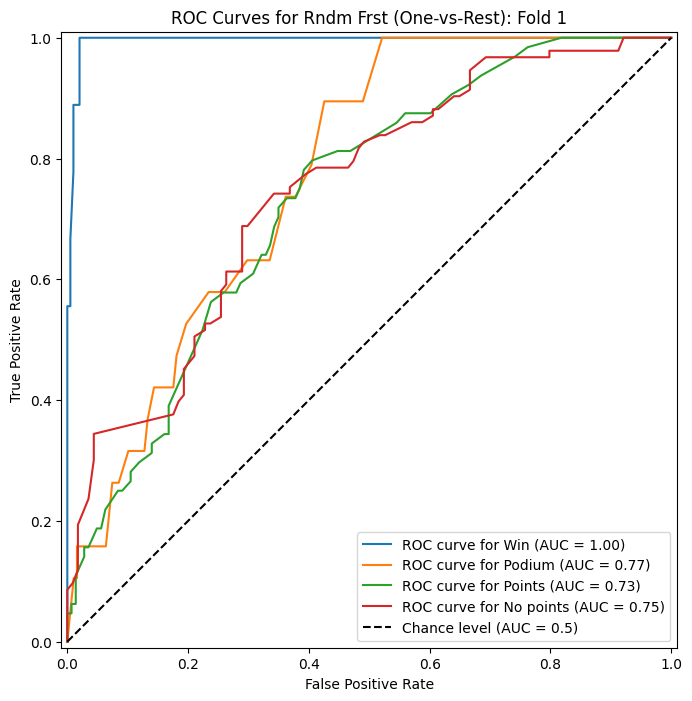

Fold 2...
(417, 83)


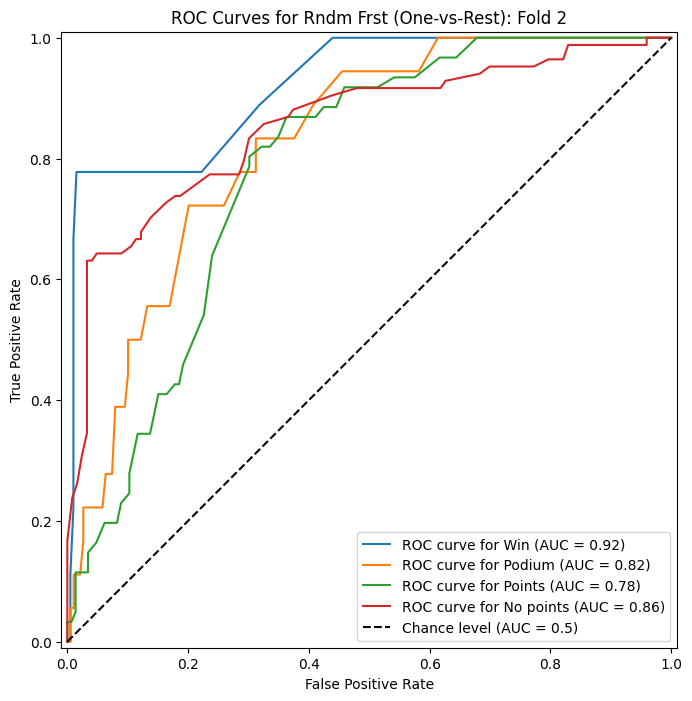

Fold 3...
(624, 83)


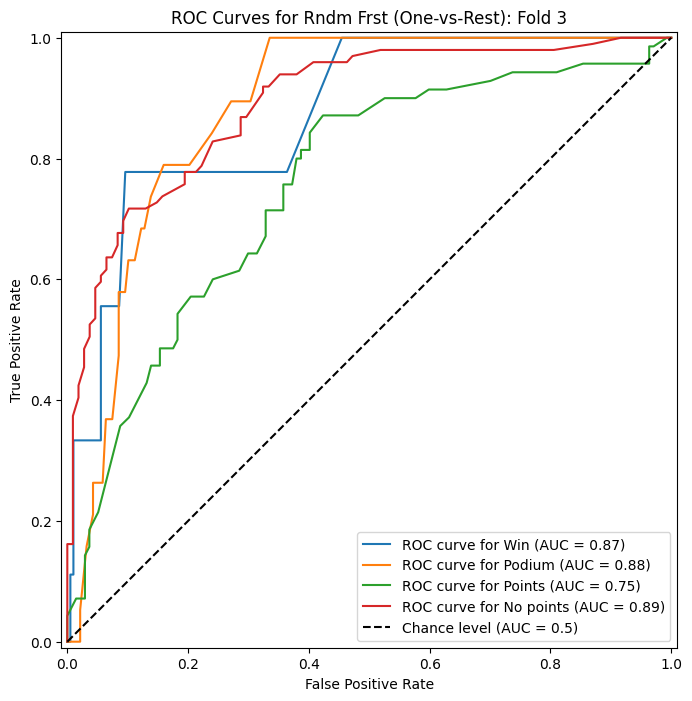

Fold 4...
(831, 83)


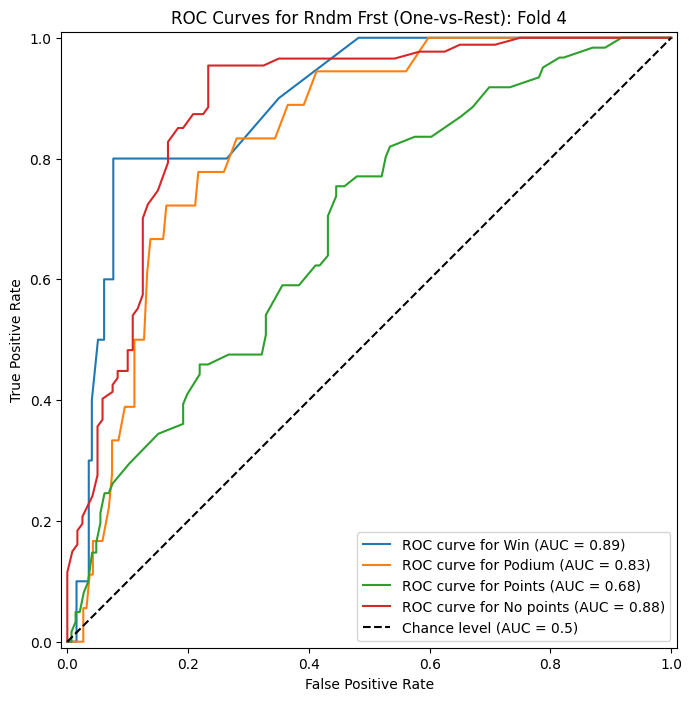

Fold 5...
(1038, 83)


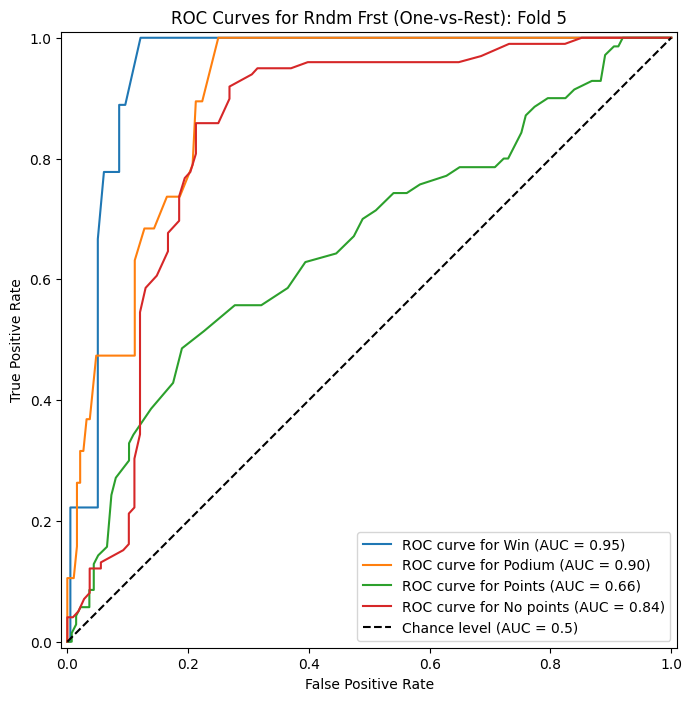

In [126]:
RandomForestPipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), # Resample the minority class
    ('classifier', RandomForestClassifier(random_state=42))
])

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}...")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    print(X_train.shape)
    RandomForestPipeline.fit(X_train, y_train)
    y_pred = RandomForestPipeline.predict_proba(X_test)
    auc_score(y_pred, y_test, fold, "Rndm Frst", "SMOTE")


Trying without resampling, and with balanced class weights

Fold 1...
(210, 83)


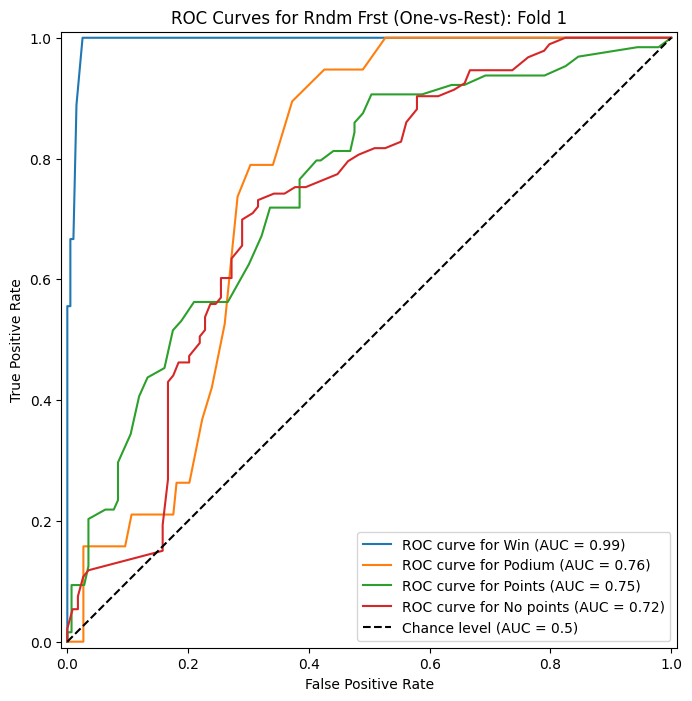

Fold 2...
(417, 83)


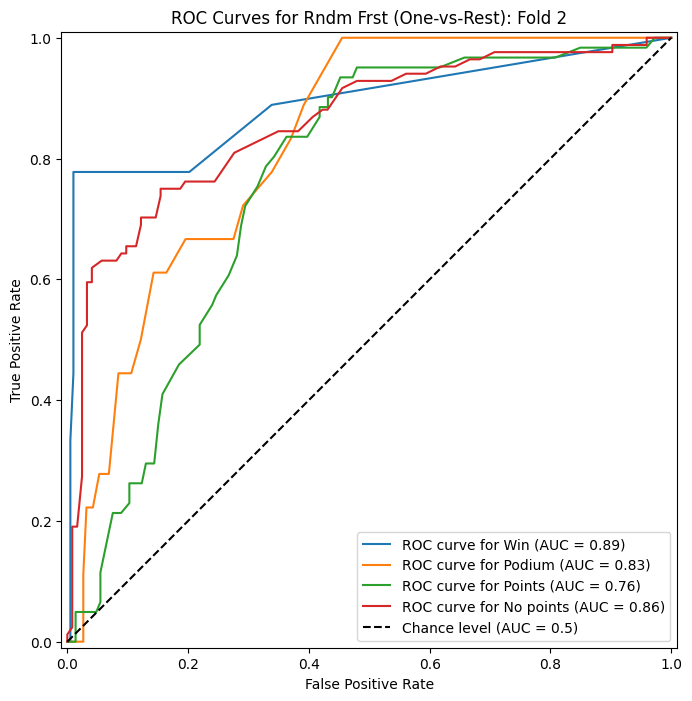

Fold 3...
(624, 83)


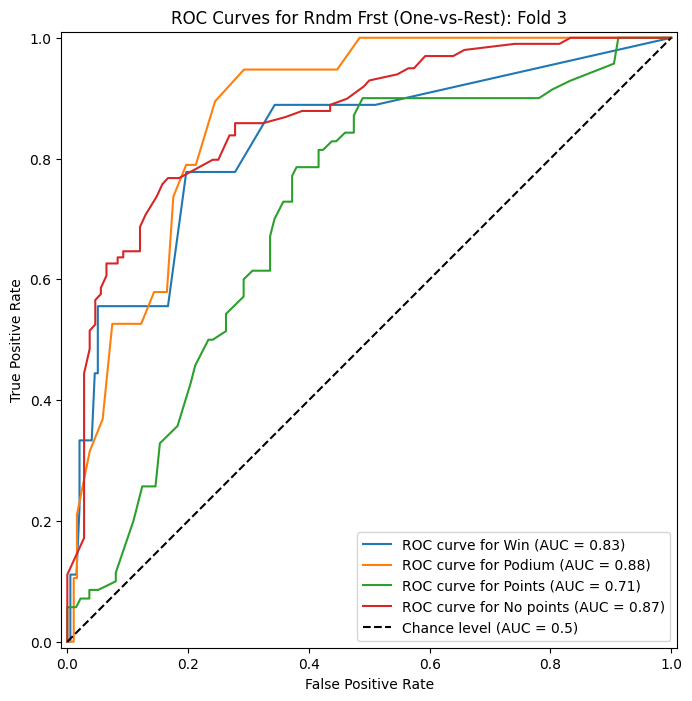

Fold 4...
(831, 83)


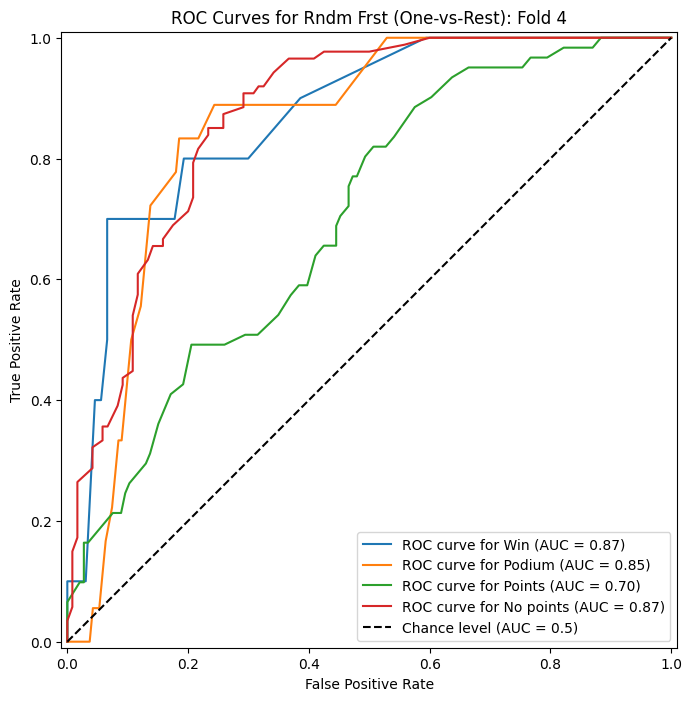

Fold 5...
(1038, 83)


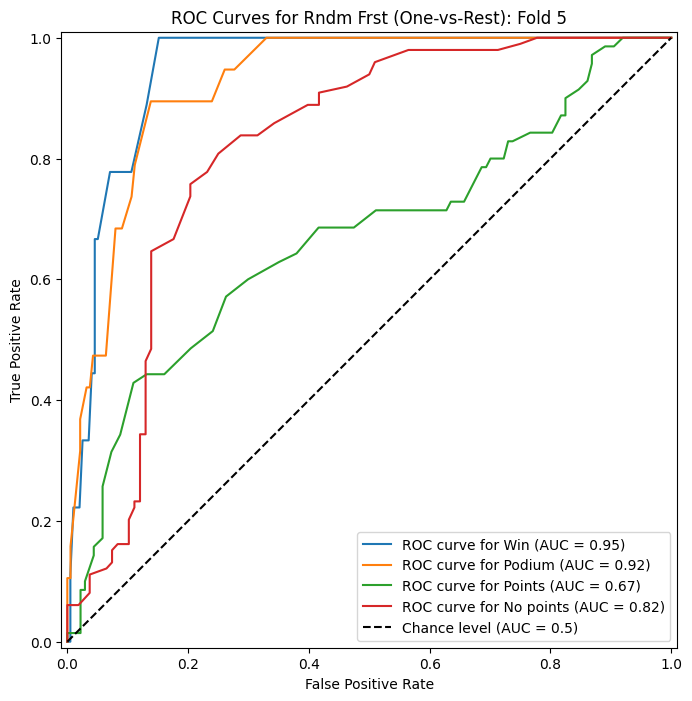

In [127]:
RandomForestPipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}...")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    print(X_train.shape)
    RandomForestPipeline.fit(X_train, y_train)
    y_pred = RandomForestPipeline.predict_proba(X_test)
    auc_score(y_pred, y_test, fold, "Rndm Frst", "Class Weights")


## Trying with XGBoost

In [128]:
num_classes = len(np.unique(y))

In [129]:
from xgboost import XGBClassifier

Trying with smote

In [130]:
from sklearn.preprocessing import LabelEncoder

Fold 1...
(210, 83)


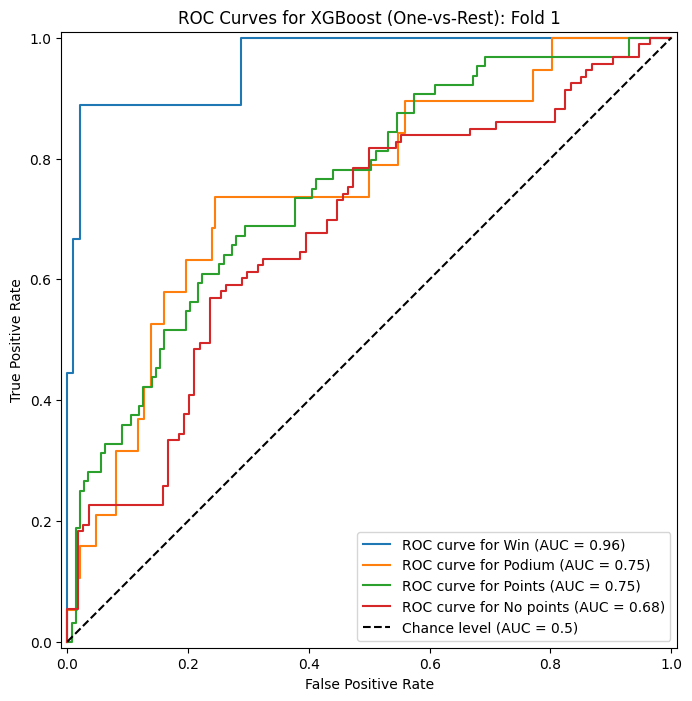

Fold 2...
(417, 83)


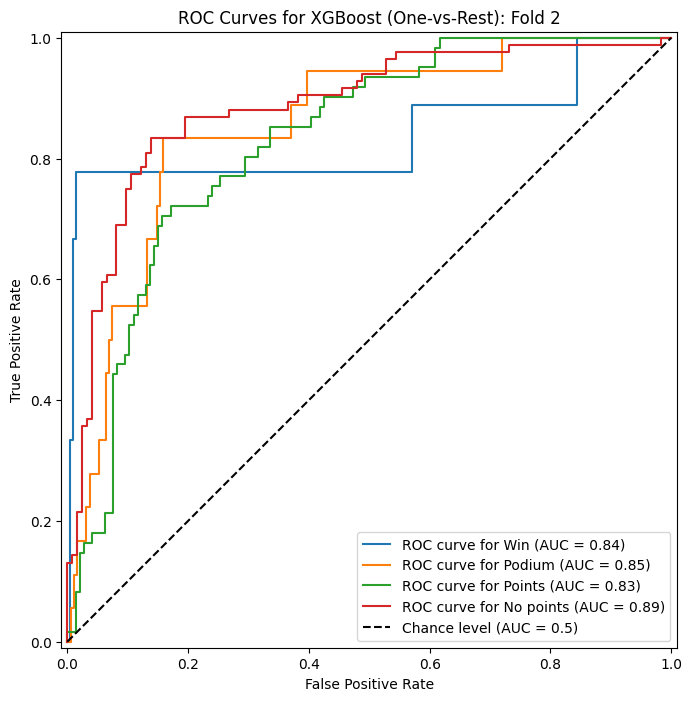

Fold 3...
(624, 83)


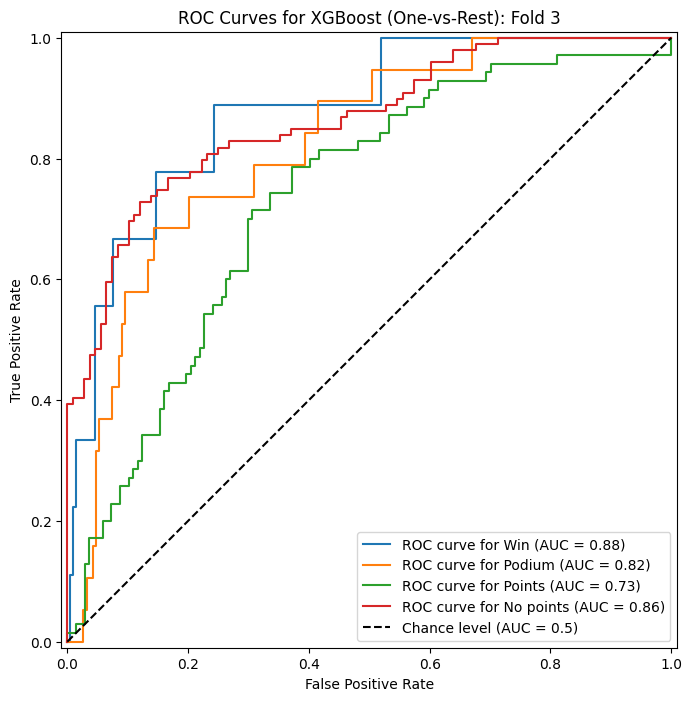

Fold 4...
(831, 83)


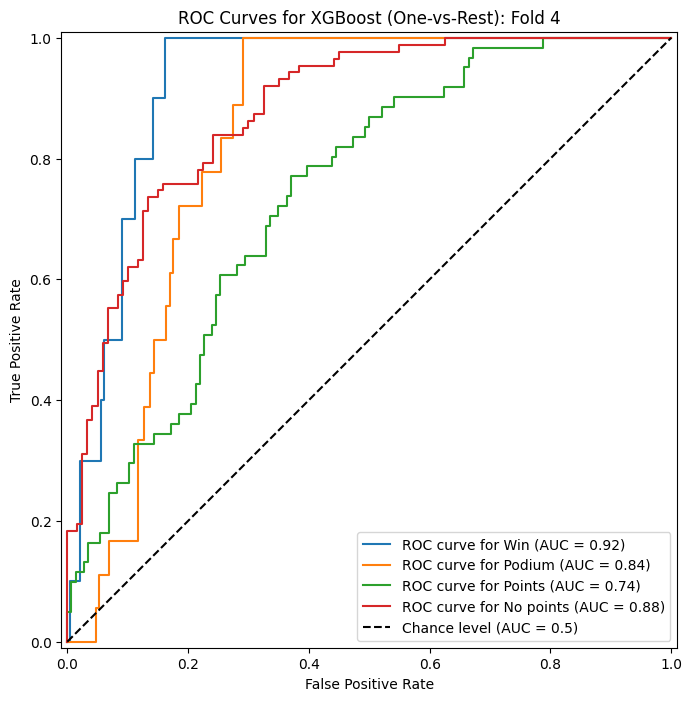

Fold 5...
(1038, 83)


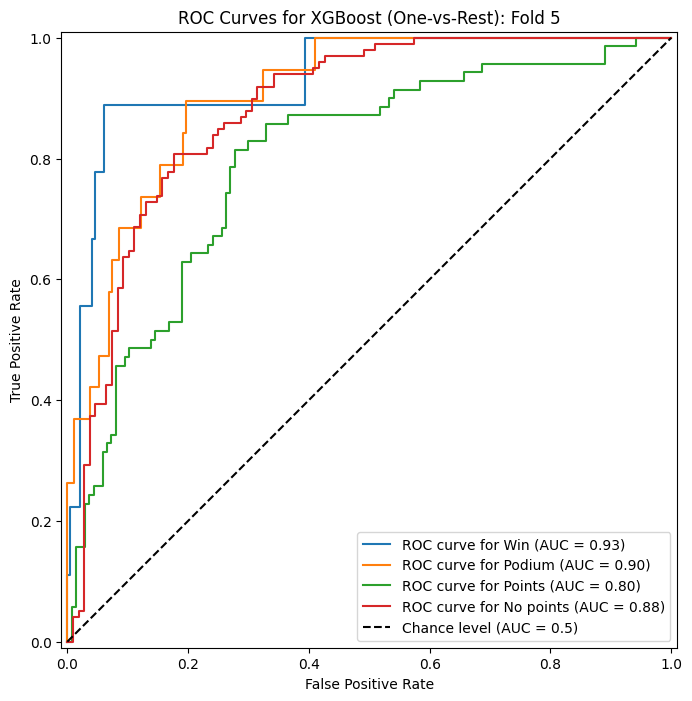

In [131]:
le = LabelEncoder()
XGBoostPipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), # Resample the minority class
    ('classifier', XGBClassifier(
        objective='multi:softmax', # Use 'multi:softmax' for multiclass
        num_class=num_classes,               # Specify the number of classes
        eval_metric='mlogloss',
        random_state=42
    )) # Model with class weights
])


for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}...")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    print(X_train.shape)
    y_train = le.fit_transform(y_train)
    XGBoostPipeline.fit(X_train, y_train)
    y_pred = XGBoostPipeline.predict_proba(X_test)
    auc_score(y_pred, y_test, fold, "XGBoost", "SMOTE")


Trying with class weights

In [132]:
from sklearn.utils.class_weight import compute_class_weight

Fold 1...
(210, 83)
Calculated Class Weights: {np.int64(0): np.float64(2.1), np.int64(1): np.float64(4.2), np.int64(2): np.float64(2.210526315789474), np.int64(3): np.float64(0.6363636363636364), np.int64(4): np.float64(0.4421052631578947)}



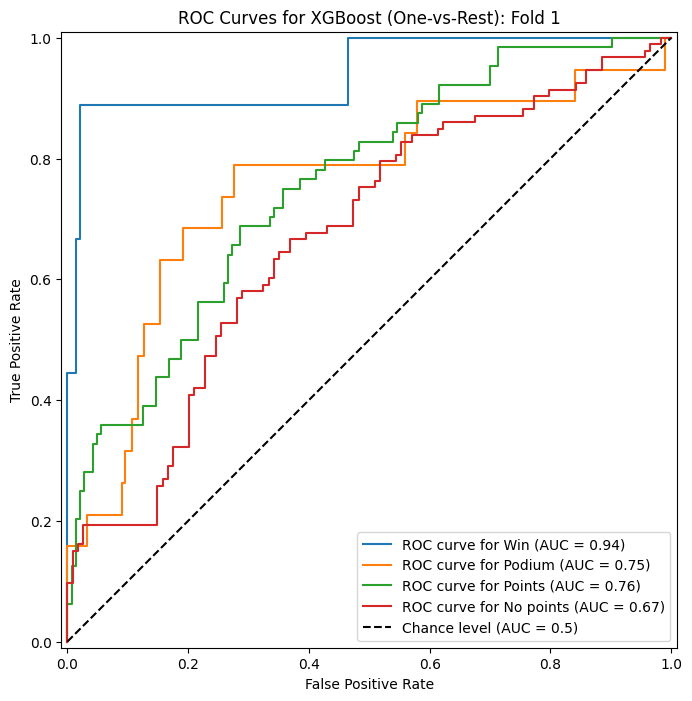

Fold 2...
(417, 83)
Calculated Class Weights: {np.int64(0): np.float64(1.9857142857142858), np.int64(1): np.float64(4.389473684210526), np.int64(2): np.float64(2.194736842105263), np.int64(3): np.float64(0.6415384615384615), np.int64(4): np.float64(0.44361702127659575)}



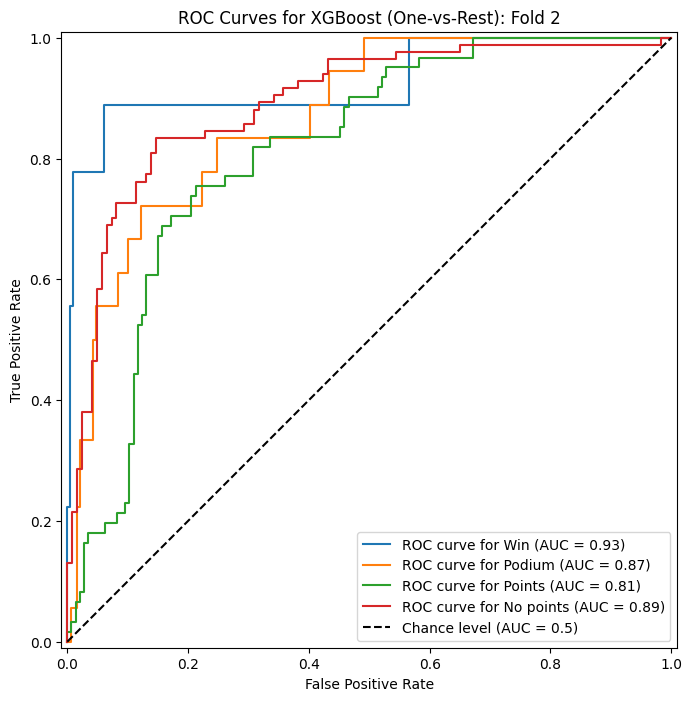

Fold 3...
(624, 83)
Calculated Class Weights: {np.int64(0): np.float64(1.6207792207792209), np.int64(1): np.float64(4.457142857142857), np.int64(2): np.float64(2.2285714285714286), np.int64(3): np.float64(0.6534031413612565), np.int64(4): np.float64(0.4588235294117647)}



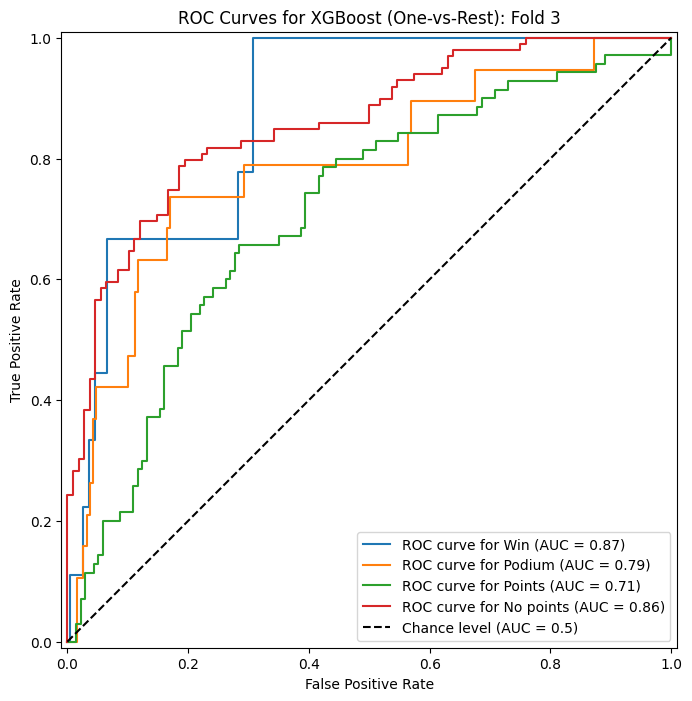

Fold 4...
(831, 83)
Calculated Class Weights: {np.int64(0): np.float64(1.910344827586207), np.int64(1): np.float64(4.491891891891892), np.int64(2): np.float64(2.216), np.int64(3): np.float64(0.6367816091954023), np.int64(4): np.float64(0.44797843665768194)}



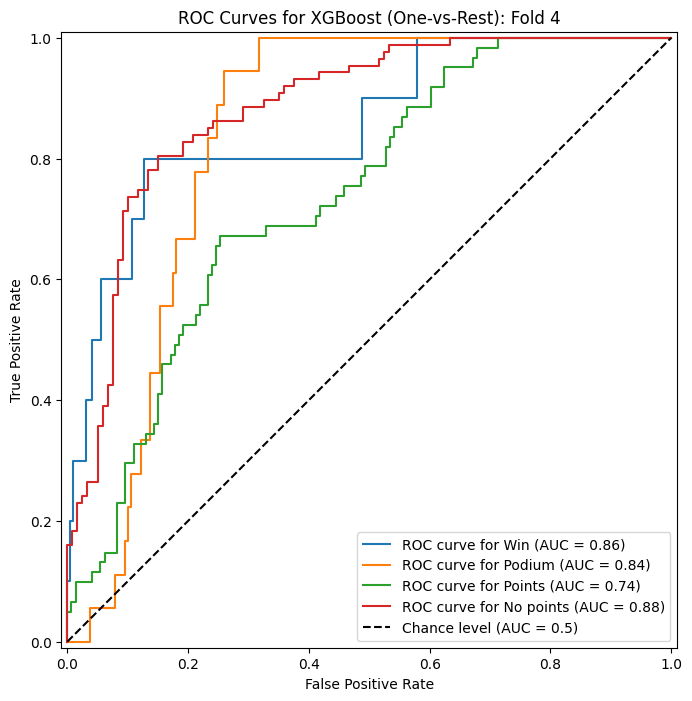

Fold 5...
(1038, 83)
Calculated Class Weights: {np.int64(0): np.float64(1.759322033898305), np.int64(1): np.float64(4.417021276595745), np.int64(2): np.float64(2.232258064516129), np.int64(3): np.float64(0.6447204968944099), np.int64(4): np.float64(0.45327510917030567)}



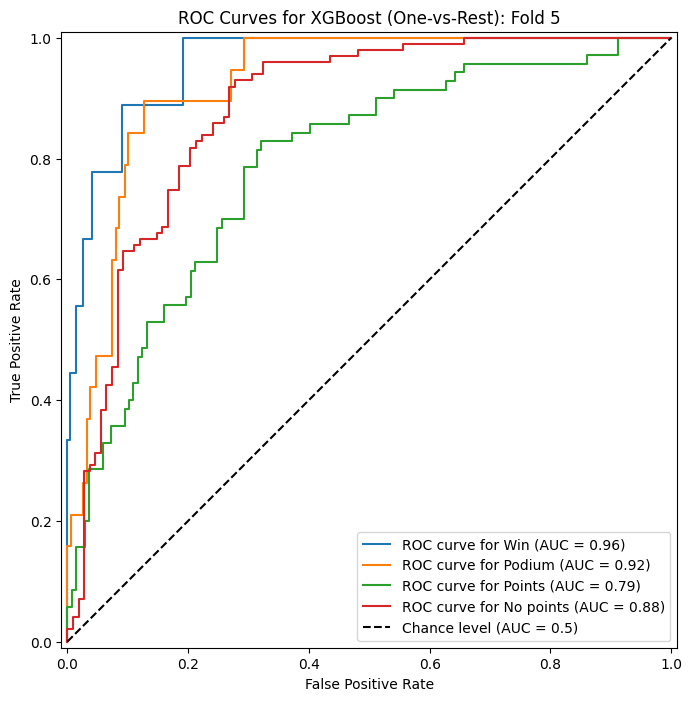

In [133]:
le = LabelEncoder()
XGBoostPipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax', # Use 'multi:softmax' for multiclass
        num_class=num_classes,               # Specify the number of classes
        eval_metric='mlogloss',
        random_state=42
    )) # Model with class weights
])


for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}...")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    print(X_train.shape)
    y_train = le.fit_transform(y_train)

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )

    class_weights_dict = dict(zip(np.unique(y_train), class_weights))
    print(f"Calculated Class Weights: {class_weights_dict}\n")

    sample_weights = np.array([class_weights_dict[i] for i in y_train])
    num_classes = len(np.unique(y_train))
    
    XGBoostPipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)
    y_pred = XGBoostPipeline.predict_proba(X_test)
    auc_score(y_pred, y_test, fold, "XGBoost", "Class Weights")

### Comparing AUCs

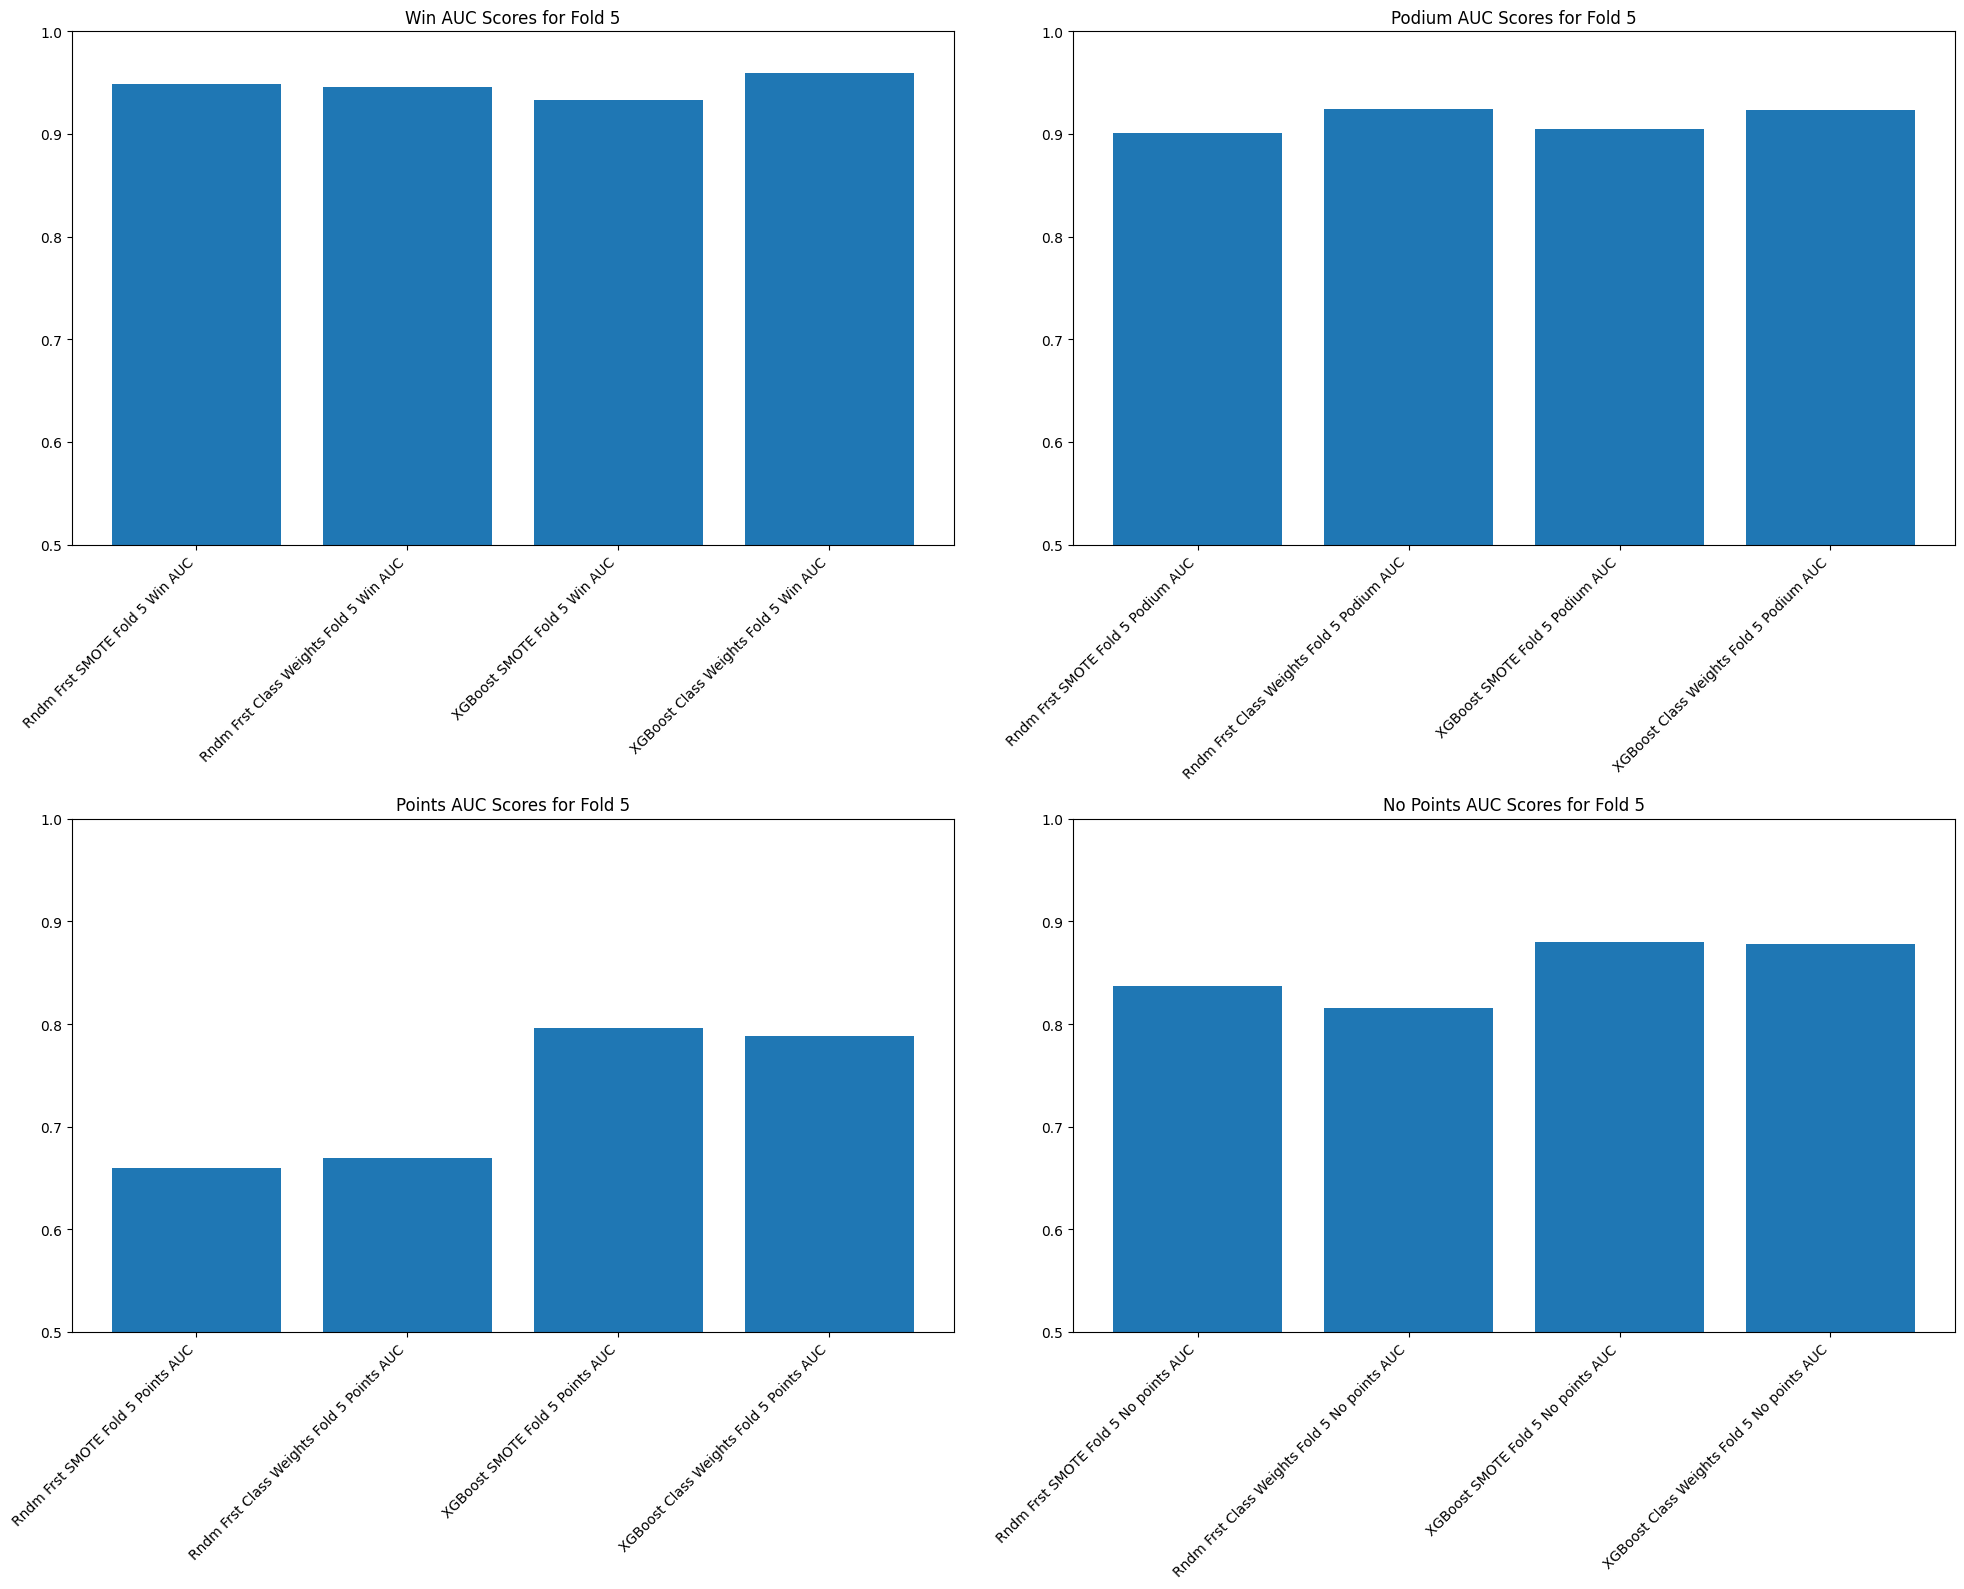

In [134]:
# Extract scores for each class
win_scores = {k:v for k,v in auc_scores.items() if 'Win AUC' in k}
podium_scores = {k:v for k,v in auc_scores.items() if 'Podium AUC' in k}
points_scores = {k:v for k,v in auc_scores.items() if 'Points AUC' in k}
no_points_scores = {k:v for k,v in auc_scores.items() if 'No points AUC' in k}

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Plot Win AUC scores
ax1.bar(range(len(win_scores)), win_scores.values())
ax1.set_xticks(range(len(win_scores)))
ax1.set_xticklabels(win_scores.keys(), rotation=45, ha='right')
ax1.set_title('Win AUC Scores for Fold 5')
ax1.set_ylim(0.5, 1)

# Plot Podium AUC scores  
ax2.bar(range(len(podium_scores)), podium_scores.values())
ax2.set_xticks(range(len(podium_scores)))
ax2.set_xticklabels(podium_scores.keys(), rotation=45, ha='right')
ax2.set_title('Podium AUC Scores for Fold 5')
ax2.set_ylim(0.5, 1)

# Plot Points AUC scores
ax3.bar(range(len(points_scores)), points_scores.values())
ax3.set_xticks(range(len(points_scores)))
ax3.set_xticklabels(points_scores.keys(), rotation=45, ha='right')
ax3.set_title('Points AUC Scores for Fold 5')
ax3.set_ylim(0.5, 1)

# Plot No Points AUC scores
ax4.bar(range(len(no_points_scores)), no_points_scores.values())
ax4.set_xticks(range(len(no_points_scores)))
ax4.set_xticklabels(no_points_scores.keys(), rotation=45, ha='right')
ax4.set_title('No Points AUC Scores for Fold 5')
ax4.set_ylim(0.5, 1)

plt.tight_layout()
plt.show()


## Tuning the model

In [135]:
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

def model_training(X, y, tscv, clf,):
    le = LabelEncoder()
    scores = []
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        print(f"Fold {fold + 1}...")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        y_train = le.fit_transform(y_train) 

        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(y_train),
            y=y_train
        )

        class_weights_dict = dict(zip(np.unique(y_train), class_weights))
        sample_weights = np.array([class_weights_dict[i] for i in y_train])

        clf.fit(X_train, y_train, classifier__verbose=False, classifier__sample_weight=sample_weights)
        pred_proba = clf.predict_proba(X_test)
        auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')
        scores.append(auc)
    avg_auc = sum(scores) / len(scores)
    print ("AUC:", avg_auc)
    return {'loss': -avg_auc, 'status': STATUS_OK }

In [136]:
space= {
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
    }

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

def objective(space):
    
    clf = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
            enable_categorical = True,
            num_class = num_classes,
            objective = 'multi:softmax',
            n_estimators = int(space['n_estimators']), 
            max_depth = int(space['max_depth']), 
            gamma = space['gamma'],
            reg_alpha = int(space['reg_alpha']),
            min_child_weight=int(space['min_child_weight']),
            colsample_bytree=space['colsample_bytree'],
            random_state = 42,
            eval_metric='auc'
        ))
    ])
    print(clf.get_params())
    return model_training(X, y, tscv, clf)


In [137]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

{'memory': None, 'steps': [('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Session_1_starting_wind_direction',
                                  'Session_1_starting_wind_speed',
                                  'Session_1_starting_rainfall',
                                  'Session_1_starting_track_temperature',
                                  'Session_1_starting_air_temperature',
                                  'Session_1_starting_humidity',
                                  'Session_1_starting_pressure',
                                  'Session_1_ending_wind_direction',
                                  '...
                                  'Session_2_session_type_id',
                                  'Session_3_session_type_id',
                                  'Session_4_session_type_id',
                                  'Session_5_session_type_id',
                

In [138]:
best_hyperparams

{'colsample_bytree': np.float64(0.999620474787524),
 'gamma': np.float64(1.039399399163915),
 'max_depth': np.float64(7.0),
 'min_child_weight': np.float64(7.0),
 'n_estimators': np.float64(600.0),
 'reg_alpha': np.float64(42.0),
 'reg_lambda': np.float64(0.6652206210056584)}

Fold 1...


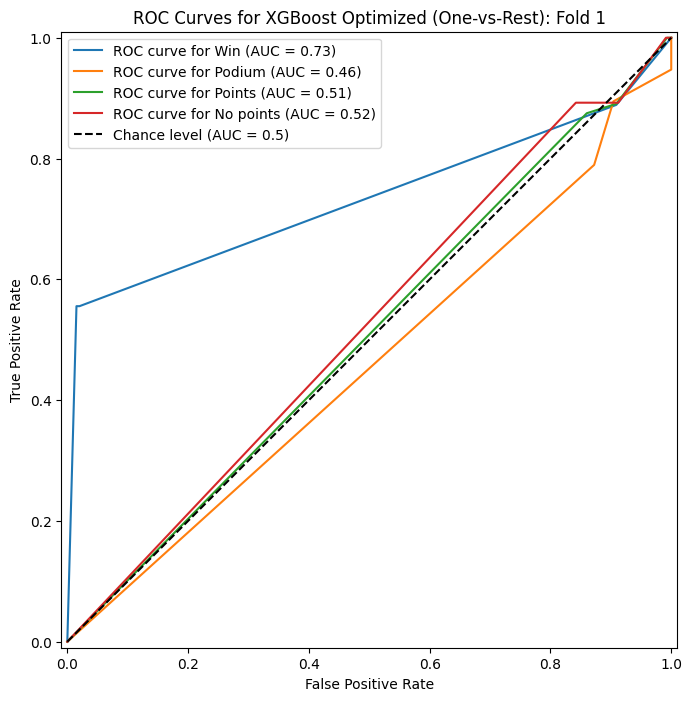

Fold 2...


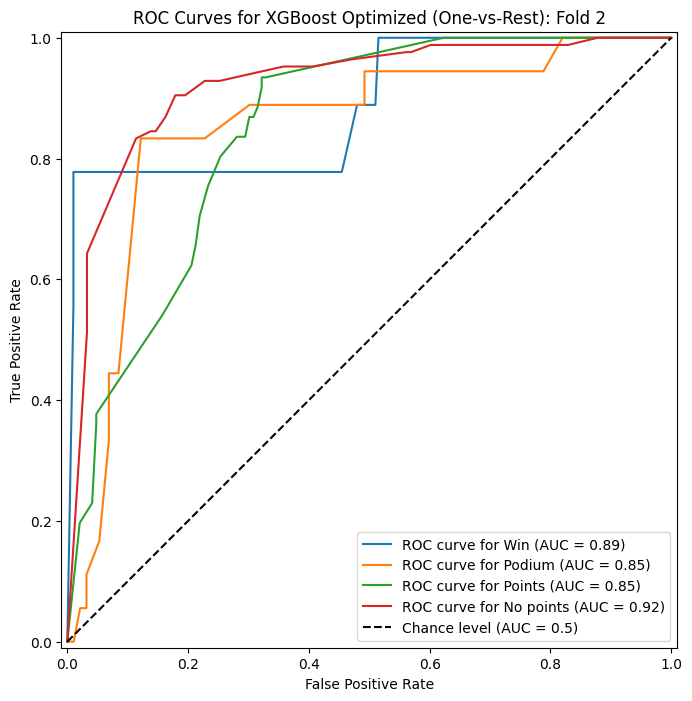

Fold 3...


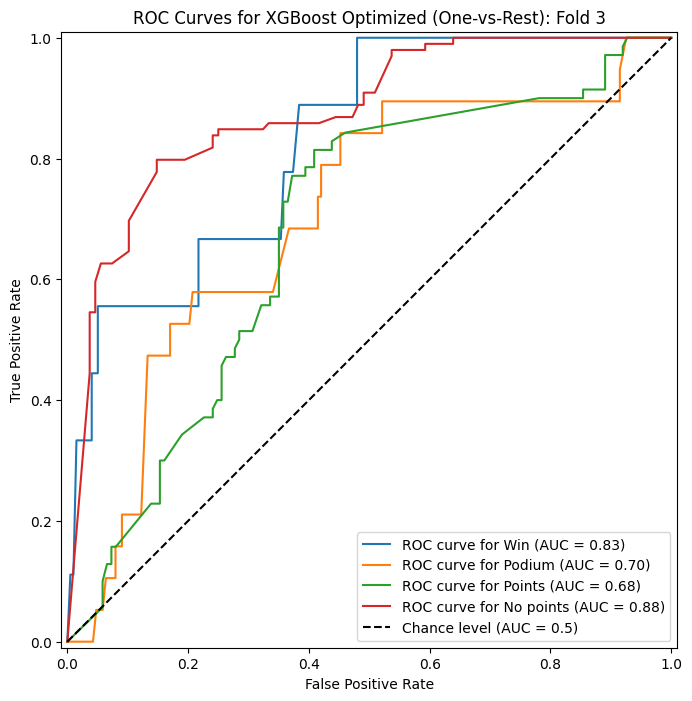

Fold 4...


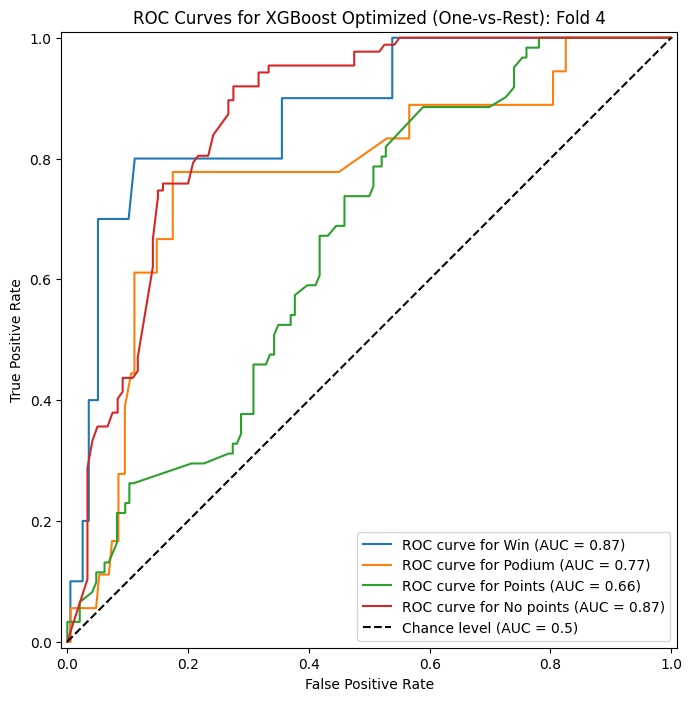

Fold 5...


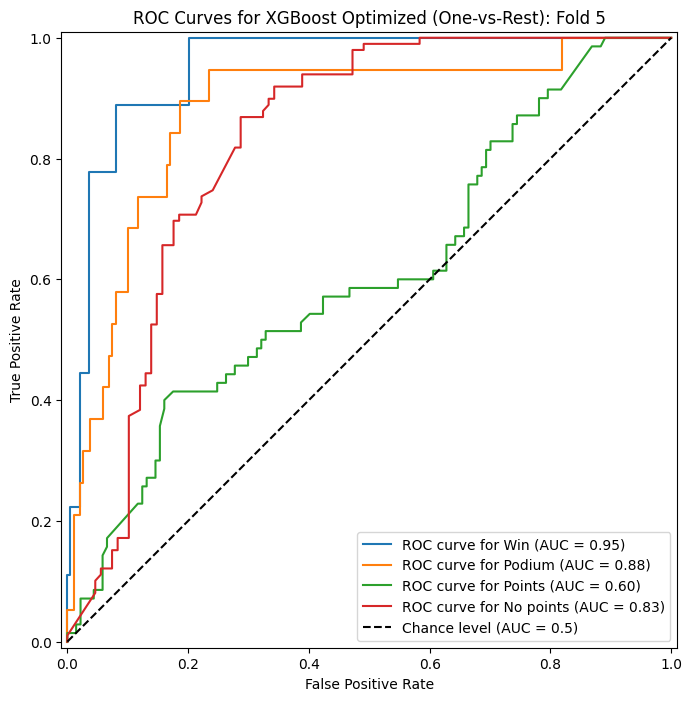

In [139]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), # Resample the minority class
    ('classifier', XGBClassifier(
        enable_categorical = True,
        n_estimators = int(best_hyperparams['n_estimators']),
        colsample_bytree = best_hyperparams['colsample_bytree'],
        max_depth = int(best_hyperparams['max_depth']),
        gamma = int(best_hyperparams['gamma']),
        reg_alpha = int(best_hyperparams['reg_alpha']),
        min_child_weight = int(best_hyperparams['min_child_weight']),
        random_state = 42,
        eval_metric='auc'
    ))
])

le = LabelEncoder()
for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}...")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    y_train = le.fit_transform(y_train)

    model.fit(X_train, y_train, classifier__verbose=False)
    y_pred = model.predict_proba(X_test)
    auc_score(y_pred, y_test, fold = fold, model_type = "XGBoost Optimized", class_imbalance_approach="SMOTE")

In [140]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        10
           0       0.00      0.00      0.00         0
           1       0.50      0.56      0.53         9
           2       0.38      0.42      0.40        19
           3       0.37      0.67      0.48        70
           4       0.71      0.29      0.41        99

    accuracy                           0.43       207
   macro avg       0.33      0.32      0.30       207
weighted avg       0.52      0.43      0.42       207



/Users/anthony/.pyenv/versions/3.10.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.10.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.10.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

The model with default params seems to perform better than the tuned model, so we stick with the untuned model

In [141]:
le = LabelEncoder()
XGBoostPipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax', # Use 'multi:softmax' for multiclass
        num_class=num_classes,               # Specify the number of classes
        eval_metric='mlogloss',
        random_state=42
    )) # Model with class weights
])


for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}...")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    print(X_train.shape)
    y_train = le.fit_transform(y_train)

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )

    class_weights_dict = dict(zip(np.unique(y_train), class_weights))
    print(f"Calculated Class Weights: {class_weights_dict}\n")

    sample_weights = np.array([class_weights_dict[i] for i in y_train])
    num_classes = len(np.unique(y_train))
    
    XGBoostPipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)
    y_pred = XGBoostPipeline.predict_proba(X_test)
    #auc_score(y_pred, y_test, fold, "XGBoost", "Class Weights")



Fold 1...
(210, 83)
Calculated Class Weights: {np.int64(0): np.float64(2.1), np.int64(1): np.float64(4.2), np.int64(2): np.float64(2.210526315789474), np.int64(3): np.float64(0.6363636363636364), np.int64(4): np.float64(0.4421052631578947)}

Fold 2...
(417, 83)
Calculated Class Weights: {np.int64(0): np.float64(1.9857142857142858), np.int64(1): np.float64(4.389473684210526), np.int64(2): np.float64(2.194736842105263), np.int64(3): np.float64(0.6415384615384615), np.int64(4): np.float64(0.44361702127659575)}

Fold 3...
(624, 83)
Calculated Class Weights: {np.int64(0): np.float64(1.6207792207792209), np.int64(1): np.float64(4.457142857142857), np.int64(2): np.float64(2.2285714285714286), np.int64(3): np.float64(0.6534031413612565), np.int64(4): np.float64(0.4588235294117647)}

Fold 4...
(831, 83)
Calculated Class Weights: {np.int64(0): np.float64(1.910344827586207), np.int64(1): np.float64(4.491891891891892), np.int64(2): np.float64(2.216), np.int64(3): np.float64(0.6367816091954023), np

In [142]:
# Save the final trained model
import joblib

# Save the entire pipeline including preprocessing and model
joblib.dump(XGBoostPipeline, 'f1_position_prediction_model.joblib')


print("Model and label encoder saved successfully")


Model and label encoder saved successfully


In [143]:
X

,team_id,driver_number,circuit_key,Session_1_session_type_id,Session_1_starting_wind_direction,Session_1_starting_wind_speed,Session_1_starting_rainfall,Session_1_starting_track_temperature,Session_1_starting_air_temperature,Session_1_starting_humidity,...,Session_5_starting_humidity,Session_5_starting_pressure,Sprint Wknd,Race Wknd,Preseason Wknd,Session_1_is_seat_driver,Session_2_is_seat_driver,Session_3_is_seat_driver,Session_4_is_seat_driver,Session_5_is_seat_driver
0,0.0,1.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,26.0,...,19.0,1016.5,0.0,0.0,1.0,1,1,1,1,1
1,1.0,2.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,26.0,...,19.0,1016.5,0.0,0.0,1.0,0,0,0,0,0
2,2.0,4.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,26.0,...,19.0,1016.5,0.0,0.0,1.0,1,1,1,1,1
3,3.0,10.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,26.0,...,19.0,1016.5,0.0,0.0,1.0,1,1,1,1,1
4,0.0,11.0,63.0,0.0,193.0,4.9,0.0,29.7,23.8,26.0,...,19.0,1016.5,0.0,0.0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,5.0,44.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,44.0,...,28.0,1019.1,0.0,0.0,0.0,1,1,1,1,1
1241,1.0,55.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,44.0,...,28.0,1019.1,0.0,0.0,0.0,1,1,1,1,1
1242,9.0,63.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,44.0,...,28.0,1019.1,0.0,0.0,0.0,1,1,1,1,1
1243,2.0,81.0,23.0,0.0,193.0,2.0,0.0,41.4,16.1,44.0,...,28.0,1019.1,0.0,0.0,0.0,1,1,1,1,1
